# **Neck Posture with video detection**

In [14]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 15.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 10.9 MB/s eta 0:00:00


In [46]:
!pip install keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.9 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 16.2 MB/s eta 0:00:00


In [47]:
!pip install joblib

In [28]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [1]:
import cv2
print(cv2.__version__)

4.10.0


In [2]:
import os
import numpy as np
import mediapipe as mp
import pandas as pd

### Run mediapipe through the pictures to extract the datapoints

In [3]:
# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# Paths to dataset folders
good_posture_dir = '/Users/gabrielaclementedeoliveira/Documents/GitHub/final_project_ironhak/pics_ml/good_neck_posture'
bad_posture_dir = '/Users/gabrielaclementedeoliveira/Documents/GitHub/final_project_ironhak/pics_ml/bad_neck_posture'

I0000 00:00:1723716817.901063 1538263 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1723716817.966848 1544955 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1723716817.972345 1544955 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [4]:
# Function to extract key points
def extract_keypoints(landmarks):
    keypoints = []
    for landmark in landmarks.landmark:
        keypoints.extend([landmark.x, landmark.y, landmark.z])
    return keypoints

# Prepare a list to hold the dataset
data = []

# Process images in the "good_neck_posture" folder
for img_name in os.listdir(good_posture_dir):
    img_path = os.path.join(good_posture_dir, img_name)
    image = cv2.imread(img_path)

    # Convert image to RGB for MediaPipe
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process the image to extract pose landmarks
    result = pose.process(image_rgb)

    if result.pose_landmarks:
        # Extract key points
        keypoints = extract_keypoints(result.pose_landmarks)
        
        # Append label ("good" = 0)
        keypoints.append(0)
        
        # Add to the dataset list
        data.append(keypoints)

# Process images in the "bad_neck_posture" folder
for img_name in os.listdir(bad_posture_dir):
    img_path = os.path.join(bad_posture_dir, img_name)
    image = cv2.imread(img_path)

    # Convert image to RGB for MediaPipe
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process the image to extract pose landmarks
    result = pose.process(image_rgb)

    if result.pose_landmarks:
        # Extract key points
        keypoints = extract_keypoints(result.pose_landmarks)
        
        # Append label ("bad" = 1)
        keypoints.append(1)
        
        # Add to the dataset list
        data.append(keypoints)

# Convert the dataset list to a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
#df.to_csv('neck_posture_dataset.csv', index=False)

/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


### Train the model on the pictures/datapoints

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.509783,0.516547,-1.555918,0.547207,0.474819,-1.458239,0.569019,0.476808,-1.458449,0.590619,...,0.276362,2.246153,1.247653,0.554638,2.300578,0.549806,0.342039,2.300393,0.357943,0
1,0.434725,0.500598,-0.801239,0.464235,0.467952,-0.737319,0.481014,0.469328,-0.738060,0.497395,...,0.339525,1.937845,-0.288995,0.575410,1.973842,-0.614793,0.379271,1.985959,-0.898473,0
2,0.496495,0.285108,-0.989493,0.502167,0.255334,-0.900144,0.508837,0.256658,-0.900631,0.512196,...,0.332257,1.772760,0.455929,0.605496,1.797387,0.411020,0.399387,1.806480,-0.121641,0
3,0.581334,0.367888,-0.210071,0.575598,0.329460,-0.149519,0.572003,0.332888,-0.150034,0.562465,...,0.555999,1.088517,-0.275254,0.601274,1.140781,-0.187546,0.694421,1.182763,-0.375835,0
4,0.537622,0.390871,-0.846038,0.552606,0.357392,-0.790469,0.557848,0.359369,-0.790669,0.560189,...,0.469139,1.735571,0.805800,0.569403,1.783784,0.439020,0.493255,1.796943,0.320384,0


In [11]:
# Separate features and labels
X = df.iloc[:, :-1].values  # All columns except the last one (key points)
y = df.iloc[:, -1].values   # The last column (labels)

In [12]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 80.39%


In [15]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logisticregression__solver': ['liblinear', 'saga']  # Solver options
}

# Create a pipeline with scaling and model
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.11/site-pack

Best parameters: {'logisticregression__C': 10, 'logisticregression__solver': 'liblinear'}
Best cross-validation score: 0.8142901234567901


/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Testing another models

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
gb_y_pred = gb_model.predict(X_test)

# Evaluate performance
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_y_pred))

Gradient Boosting Accuracy: 0.8137254901960784


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.6862745098039216


### Ensemble Methods:
Combine multiple models using VotingClassifier to potentially improve performance.

In [18]:
from sklearn.ensemble import VotingClassifier

# Initialize base models
lr_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create an ensemble of models
ensemble_model = VotingClassifier(estimators=[
    ('lr', lr_model), 
    ('rf', rf_model), 
    ('gb', gb_model)
], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions
ensemble_y_pred = ensemble_model.predict(X_test)

# Evaluate performance
print("Ensemble Model Accuracy:", accuracy_score(y_test, ensemble_y_pred))

Ensemble Model Accuracy: 0.7352941176470589


In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.69607843 0.78217822 0.69306931 0.69306931 0.52475248]
Mean Accuracy: 0.6778295476606483


Ensemble Model Accuracy: 0.7352941176470589


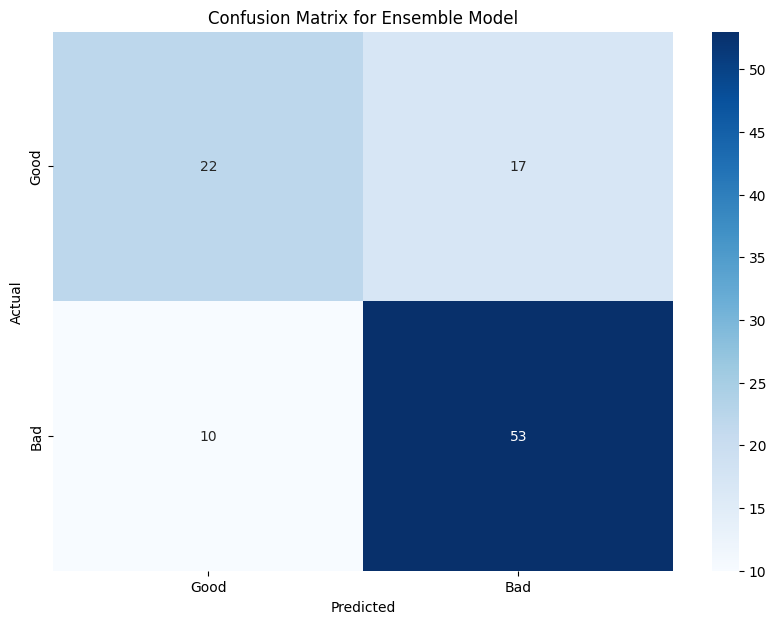

Classification Report:
               precision    recall  f1-score   support

        Good       0.69      0.56      0.62        39
         Bad       0.76      0.84      0.80        63

    accuracy                           0.74       102
   macro avg       0.72      0.70      0.71       102
weighted avg       0.73      0.74      0.73       102



In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming you've already trained your ensemble model and made predictions
ensemble_y_pred = ensemble_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, ensemble_y_pred)
print("Ensemble Model Accuracy:", accuracy)

# Compute the confusion matrix
cm = confusion_matrix(y_test, ensemble_y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Ensemble Model')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, ensemble_y_pred, target_names=['Good', 'Bad']))

GridSearchCV Model Accuracy: 78.43%


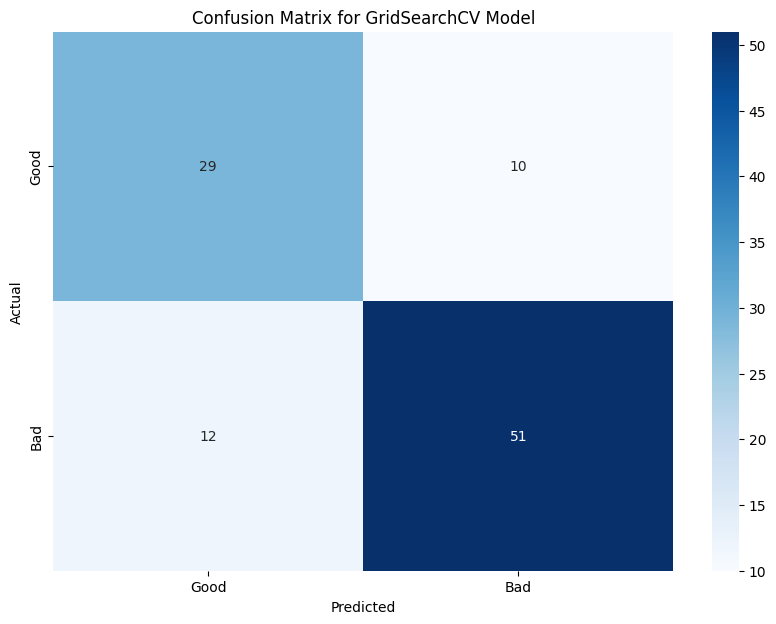

Classification Report:
               precision    recall  f1-score   support

        Good       0.71      0.74      0.72        39
         Bad       0.84      0.81      0.82        63

    accuracy                           0.78       102
   macro avg       0.77      0.78      0.77       102
weighted avg       0.79      0.78      0.79       102



In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Make predictions with the best model found by GridSearchCV
grid_y_pred = grid_search.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, grid_y_pred)
print(f"GridSearchCV Model Accuracy: {accuracy * 100:.2f}%")

# Compute the confusion matrix
cm = confusion_matrix(y_test, grid_y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for GridSearchCV Model')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, grid_y_pred, target_names=['Good', 'Bad']))

### Saving the model

In [22]:
import joblib

# Save the trained ensemble model
#joblib.dump(ensemble_model, 'ensemble_model.pkl')

In [23]:
# Load the trained model
loaded_model = joblib.load('ensemble_model.pkl')

# Make predictions with the loaded model
loaded_y_pred = loaded_model.predict(X_test)

# Evaluate performance
print("Loaded Model Accuracy:", accuracy_score(y_test, loaded_y_pred))

Loaded Model Accuracy: 0.803921568627451


In [24]:
# Save the best model from GridSearchCV
#joblib.dump(grid_search.best_estimator_, 'best_logistic_model.pkl')

In [25]:
# Load the saved model
loaded_model = joblib.load('best_logistic_model.pkl')

# Use the model to make predictions
y_pred = loaded_model.predict(X_test)

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 83.33%


## Video recognition of the neck posture

In [ ]:
# Load the trained ensemble model
model = joblib.load('best_logistic_model.pkl')

# Initialize MediaPipe for pose detection
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# Define function to extract key points
def extract_keypoints(landmarks):
    keypoints = []
    for landmark in landmarks.landmark:
        keypoints.extend([landmark.x, landmark.y, landmark.z])
    return keypoints

# Initialize webcam
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if not ret:
        break
    
    # Convert image to RGB
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Process the image
    result = pose.process(image_rgb)
    
    if result.pose_landmarks:
        # Extract key points
        keypoints = extract_keypoints(result.pose_landmarks)
        
        # Prepare keypoints for prediction
        keypoints_array = np.array(keypoints).reshape(1, -1)
        
        # Predict posture
        prediction = model.predict(keypoints_array)
        
        # Display result and alert
        if prediction[0] == 1:
            cv2.putText(frame, "Bad Posture Alert!", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
        else:
            cv2.putText(frame, "Good Posture", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    
    # Display the resulting frame
    cv2.imshow('Posture Detection', frame)
    
    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()

I0000 00:00:1723716960.437388 1538263 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M2
W0000 00:00:1723716960.515544 1547191 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1723716960.520697 1547191 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
